In [1]:
%load_ext tikzmagic
%matplotlib inline

# 범주형 독립변수

In [2]:
import seaborn as sns

tips = sns.load_dataset("tips").sample(30).reset_index(drop=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,12.48,2.52,Female,No,Thur,Lunch,2
1,9.60,4.00,Female,Yes,Sun,Dinner,2
2,5.75,1.00,Female,Yes,Fri,Dinner,2
3,11.61,3.39,Male,No,Sat,Dinner,2
4,17.78,3.27,Male,No,Sat,Dinner,2


## 레벨이 2개인 범주형 독립변수

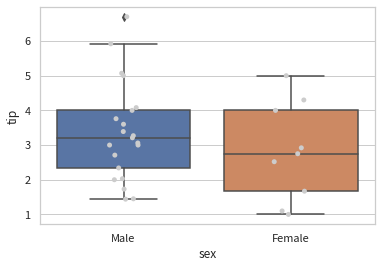

In [3]:
sns.boxplot(x="sex", y="tip", data=tips)
sns.stripplot(x="sex", y="tip", data=tips, color="0.8")
plt.show()

In [4]:
import numpy as np

tips.groupby("sex").agg({"tip": [np.mean, np.std]})

tip          
            mean       std
sex                       
Male    3.369524  1.412800
Female  2.806667  1.415618

In [5]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula("tip ~ C(sex)", tips)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9988
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.326
Time:                        15:24:49   Log-Likelihood:                -51.918
No. Observations:                  30   AIC:                             107.8
Df Residuals:                      28   BIC:                             110.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.3695      0.308  

In [6]:
import pandas as p

In [7]:
X1 = pd.DataFrame(model1.exog, columns=model1.exog_names).head(10).astype(int)
X1.style.background_gradient(vmin=0, vmax=1)

,Intercept,C(sex)[T.Female]
0,1,1
1,1,1
2,1,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,1


In [8]:
model2 = sm.OLS.from_formula("tip ~ C(sex) + 0", tips)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9988
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.326
Time:                        15:24:49   Log-Likelihood:                -51.918
No. Observations:                  30   AIC:                             107.8
Df Residuals:                      28   BIC:                             110.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
C(sex)[Male]       3.3695      0.308     10.

In [9]:
X2 = pd.DataFrame(model2.exog, columns=model2.exog_names).head(10).astype(int)
X2.style.background_gradient(vmin=0, vmax=1)

,C(sex)[Male],C(sex)[Female]
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,0,1


## 레벨이 3개 이상인 범주형 독립변수

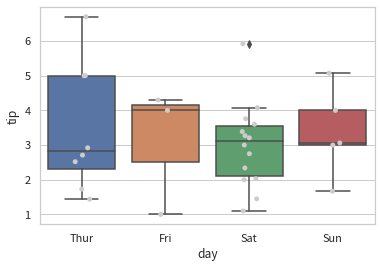

In [10]:
sns.boxplot(x="day", y="tip", data=tips)
sns.stripplot(x="day", y="tip", data=tips, color=".8")
plt.show()

In [11]:
tips.groupby("day").agg({"tip": [np.mean, np.std]})

tip          
          mean       std
day                     
Thur  3.502500  1.853080
Fri   3.100000  1.824829
Sat   2.992857  1.220034
Sun   3.360000  1.265840

In [12]:
model3 = sm.OLS.from_formula("tip ~ C(day)", tips)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.2288
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.875
Time:                        15:24:49   Log-Likelihood:                -52.052
No. Observations:                  30   AIC:                             112.1
Df Residuals:                      26   BIC:                             117.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5025      0.521      6.723

In [13]:
X3 = pd.DataFrame(model3.exog, columns=model3.exog_names).head(10).astype(int)
X3.style.background_gradient(vmin=0, vmax=1)

,Intercept,C(day)[T.Fri],C(day)[T.Sat],C(day)[T.Sun]
0,1,0,0,0
1,1,0,0,1
2,1,1,0,0
3,1,0,1,0
4,1,0,1,0
5,1,0,0,0
6,1,0,1,0
7,1,0,1,0
8,1,0,0,0
9,1,0,1,0


In [14]:
model4 = sm.OLS.from_formula("tip ~ C(day, Treatment('Sun'))", tips)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.2288
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.875
Time:                        15:24:49   Log-Likelihood:                -52.052
No. Observations:                  30   AIC:                             112.1
Df Residuals:                      26   BIC:                             117.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [15]:
X4 = pd.DataFrame(model4.exog, columns=model4.exog_names).head(10).astype(int)
X4.style.background_gradient(vmin=0, vmax=1)

,Intercept,"C(day, Treatment('Sun'))[T.Thur]","C(day, Treatment('Sun'))[T.Fri]","C(day, Treatment('Sun'))[T.Sat]"
0,1,1,0,0
1,1,0,0,0
2,1,0,1,0
3,1,0,0,1
4,1,0,0,1
5,1,1,0,0
6,1,0,0,1
7,1,0,0,1
8,1,1,0,0
9,1,0,0,1


In [16]:
model5 = sm.OLS.from_formula("tip ~ C(day) + 0", tips)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                 -0.087
Method:                 Least Squares   F-statistic:                    0.2288
Date:                Sun, 14 Aug 2022   Prob (F-statistic):              0.875
Time:                        15:24:49   Log-Likelihood:                -52.052
No. Observations:                  30   AIC:                             112.1
Df Residuals:                      26   BIC:                             117.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(day)[Thur]     3.5025      0.521      6.723   

In [17]:
X5 = pd.DataFrame(model5.exog, columns=model5.exog_names).head(10).astype(int)
X5.style.background_gradient(vmin=0, vmax=1)

,C(day)[Thur],C(day)[Fri],C(day)[Sat],C(day)[Sun]
0,1,0,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,1,0,0,0
6,0,0,1,0
7,0,0,1,0
8,1,0,0,0
9,0,0,1,0


## 복수의 범주형 독립변수

In [ ]:
g = sns.catplot(x="sex", y="tip", col="day", data=tips, kind="box", width=0.2, aspect=0.6)
g.map_dataframe(sns.stripplot, x="sex", y="tip", hue="day")
plt.show()